### Importing libraries

In [2]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.sparse import coo_matrix
import regex as re

# Import TfidfVectorizer from sklearn.feature_extraction.text 
from sklearn.feature_extraction.text import TfidfVectorizer


# Part 1

### Read in csv file

In [14]:
file = pd.read_csv('chicago-taxi-rides.csv')

### 1.0 Plot

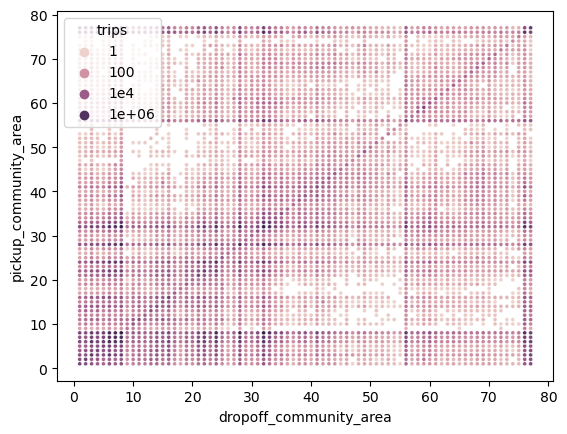

In [15]:
sb.scatterplot(x='dropoff_community_area',y='pickup_community_area',data=file,hue='trips',hue_norm=LogNorm(), s = 8)

plt.show()



### 1.1 Read data as matrix

In [16]:
# removing NaN datapoints
file_cleaned = file.dropna()

# getting row, column, and value from df
row = np.array(file_cleaned['dropoff_community_area'].tolist()) - 1
col = np.array(file_cleaned['pickup_community_area'].tolist()) - 1
val = np.array(file_cleaned['trips'].tolist()) - 1

# read df as a matrix
data = coo_matrix((val, (row, col)), shape=(77, 77)).toarray()
print(data)

[[  110696    28109    41574     9767     5227    63660    21552    70133
        27      216      736      188     1112     3211      325     2620
        25        8       98       55     1183     4872      155     9799
        29       10       31    14890       59       43      303    34670
      2026      141      104       15        8       27      115        8
       453       37       31       31       10       17        0        1
         5        1        3        2        0        0        2     6101
        12       27       50       64       18        7        5        3
         4       20        5        9        9        5        7        8
         0        0        1    35847    69416]
 [   40534   169483    22063    28752     5751    25555    10920    37971
        36      627     1399      830     4465     7500      606     3805
        56       10      242       56     1603     3884      186     5646
        51       14       31     8612       34       95      137

### 1.2 TraffickRank Algorithm

In [17]:
# input: data is a matrix of ranks
def getrank (weight, rank, beta, iterations):
    # initialize ranks if not already did
    
    # algorithm
    result = rank
    for i in range(iterations):
        result = beta * np.matmul(weight, result.transpose()) + (1- beta) * np.full((1,77), 1/77)
    return result
    
    
# calculate initial rank:
initial = np.full((77, 77), 1/77)

# calculate the weights for the matrix, proportional to the number of drop off trips from point A to B
weight = data / np.sum(data, axis=1)[np.newaxis, :]
# print(len(initial))
# print(len(weight))


    

#### Iteration 0

In [18]:
print(initial)

[[0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
  0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0

#### Iteration 1

In [9]:
print(getrank(weight, initial, 0.85, 1))

[[0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359 0.00723359
  0.00723359 0.00723359 0.00723359 0.00723359 0.00723359]
 [0.00962373 0.00962373 0.00962373 0.00962373 0.00962373 0.00962373
  0.00962373 0.00962373 0.00962373 0.00962373 0.00962373 0

#### Iteration 2

In [10]:
print(getrank(weight, initial, 0.85, 2))

[[0.00489203 0.00586478 0.00690855 0.00519    0.00459947 0.01080421
  0.00797844 0.02381865 0.00303822 0.00453918 0.00477621 0.00375413
  0.00431155 0.00465871 0.00495243 0.00549384 0.00388104 0.00335548
  0.00400631 0.00328097 0.0046183  0.0059517  0.00367004 0.00789392
  0.00477159 0.00339825 0.00353452 0.0139497  0.00344876 0.003824
  0.00381895 0.0187661  0.00697826 0.0039831  0.00489224 0.00361534
  0.00388049 0.00438707 0.00429588 0.00390865 0.00686315 0.00460963
  0.00537188 0.00596277 0.00401632 0.00428914 0.00355129 0.0045582
  0.00637335 0.00397316 0.00475068 0.00327656 0.00419339 0.00375162
  0.00362403 0.00828765 0.00361996 0.00429831 0.00632561 0.00359552
  0.00401979 0.00351509 0.00360082 0.00401349 0.00357215 0.00403795
  0.00414742 0.00430583 0.00481835 0.00409713 0.00417262 0.00317644
  0.00375156 0.00305979 0.00344483 0.00911804 0.00601508]
 [0.0062233  0.00763594 0.0091517  0.00665603 0.00579845 0.014809
  0.01070541 0.03370862 0.0035312  0.0057109  0.00605511 0.0045

#### Iteration 3

In [11]:
print(getrank(weight, initial, 0.85, 3))

[[0.00423859 0.00491586 0.00564257 0.00444605 0.0040349  0.00835487
  0.00638747 0.01741602 0.0029479  0.00399292 0.00415795 0.00344635
  0.00383444 0.00407615 0.00428064 0.00465759 0.0035347  0.00316879
  0.00362192 0.00311691 0.00404801 0.00497637 0.00338779 0.00632862
  0.00415474 0.00319857 0.00329344 0.01054488 0.00323373 0.00349499
  0.00349147 0.01389824 0.0056911  0.00360576 0.00423874 0.00334971
  0.00353432 0.00388702 0.00382353 0.00355393 0.00561096 0.00404197
  0.00457268 0.00498408 0.00362889 0.00381884 0.00330512 0.00400617
  0.00526994 0.00359884 0.00414018 0.00311384 0.00375217 0.0034446
  0.00335577 0.00660275 0.00335293 0.00382522 0.0052367  0.00333591
  0.0036313  0.00327992 0.00333961 0.00362692 0.00331964 0.00364395
  0.00372017 0.00383046 0.0041873  0.00368515 0.00373772 0.00304414
  0.00344455 0.00296292 0.003231   0.0071809  0.0050205 ]
 [0.00523815 0.0062053  0.00724304 0.00553441 0.00494727 0.01111625
  0.00830677 0.02405567 0.00339503 0.00488733 0.00512299 0.

#### Iteration 4

In [19]:
print(getrank(weight, initial, 0.85, 4))

[[0.00388166 0.00437773 0.00528665 0.00408213 0.00388274 0.00879503
  0.00716782 0.02208379 0.00284675 0.00351813 0.00364467 0.00314057
  0.00340438 0.0036485  0.00373826 0.00412129 0.00316824 0.00293409
  0.0032299  0.00293556 0.00364147 0.00466182 0.00312318 0.00646903
  0.00354514 0.0029515  0.00301994 0.01062414 0.0030008  0.00313786
  0.00323988 0.01644402 0.00553639 0.00329109 0.00370422 0.0030529
  0.00315871 0.0034161  0.00343344 0.003189   0.00471712 0.00353909
  0.00389736 0.00424045 0.00322601 0.00334612 0.00301068 0.00349034
  0.00466416 0.00319859 0.0035731  0.00290282 0.00330176 0.0030855
  0.00303044 0.00541864 0.00303804 0.00335764 0.00478083 0.00309644
  0.00322443 0.0029958  0.00303174 0.0032123  0.00302382 0.00323727
  0.00328976 0.00336575 0.00364475 0.00325198 0.00330298 0.00288921
  0.00311001 0.0028324  0.00297639 0.0066866  0.00466243]
 [0.00473082 0.00544042 0.00673716 0.00501714 0.00473101 0.01174187
  0.00941593 0.0306903  0.00325126 0.00421247 0.00439343 0.0

#### Iteration 5

In [20]:
print(getrank(weight, initial, 0.85, 5))

[[0.00374614 0.00418511 0.00495324 0.00391888 0.00373267 0.00791163
  0.00648961 0.01903197 0.00283896 0.00344208 0.00355352 0.0031058
  0.00334121 0.00355078 0.00363598 0.00396465 0.00313384 0.0029234
  0.00318862 0.00292091 0.00354326 0.00441347 0.00308796 0.00593423
  0.00347477 0.00293922 0.00299988 0.00950859 0.00298059 0.00310709
  0.00318732 0.01433553 0.00515366 0.00323575 0.00360618 0.00302984
  0.0031263  0.00335415 0.00336337 0.00315157 0.00450173 0.00346207
  0.00378203 0.00408161 0.00318604 0.00329415 0.0029934  0.0034211
  0.00443597 0.0031623  0.00349581 0.00289486 0.00325447 0.00306223
  0.00301255 0.0051249  0.00301835 0.00330369 0.00452567 0.00306322
  0.00318497 0.00297989 0.00301244 0.00317509 0.00300479 0.00319598
  0.00324275 0.00331045 0.00355564 0.00321049 0.00325442 0.00287922
  0.00308156 0.00282869 0.00296114 0.0061658  0.00441706]
 [0.00446945 0.00506892 0.00609412 0.00470228 0.00444157 0.01003812
  0.00810791 0.02480441 0.00323623 0.00406581 0.00421763 0.00

#### Iteration 6

In [21]:
print(getrank(weight, initial, 0.85, 6))

[[0.00365956 0.00401813 0.00484177 0.00382898 0.00369827 0.00797379
  0.00669939 0.01997276 0.00283058 0.00334587 0.00343643 0.00306178
  0.00326208 0.00346227 0.00351311 0.00383497 0.00308246 0.00290397
  0.00313327 0.00290394 0.00347421 0.0043702  0.00305629 0.00599788
  0.00336387 0.00291771 0.00297254 0.00961891 0.00295447 0.00306172
  0.00315742 0.01477674 0.00512393 0.00318975 0.00349623 0.00299412
  0.00307171 0.00326653 0.00328071 0.00309331 0.00426381 0.00335311
  0.00361543 0.00386093 0.00312022 0.00321057 0.00296151 0.00331265
  0.00419793 0.00310029 0.00337261 0.00287926 0.00317609 0.00301753
  0.00297693 0.00489134 0.00298338 0.00322269 0.00433218 0.00303583
  0.00312396 0.00295085 0.00297821 0.00311171 0.00297136 0.00312938
  0.0031669  0.00322393 0.00342687 0.00314011 0.00317745 0.0028647
  0.00303521 0.00282197 0.00293509 0.00605845 0.00430246]
 [0.00436091 0.00485958 0.00595437 0.00458958 0.00439844 0.01011604
  0.00837092 0.0259839  0.00322572 0.00394519 0.00407084 0.

### 1.3 Qualitative Analysis

Based on the hardship index report, I assume that taxi drop off at more well-to-do (lower hardship index) areas will have higher ranks than other areas because these areas could be the CBD or wealthy residential areas, and people who are going to these areas (probably commuting there to work or live there) could have potentially more money to afford a taxi than people living and working in other areas. The output of my matrix is formatted as row - drop off and column - pick up. Taking a look at row 6, 7, and 8 in matrix 6, which correspond to areas 6,7,8 (which have relatively low hardship index around 10), we will see that the rankings in these 3 rows are much higher than the rows before and after them. In fact, area 1, 2, 3, 4, 5, 9,10,11, which are area 6,7,8's adjacent areas, all have relatively high hardship index from 20 to 30. Let's take the first element of each row as an example. The first elements of row 6, 7, 8 are, respectively, 0.01078817, 0.00844085, 0.02986926; whereas the first elements of row 1,3,10 (just picking a few as examples) are, respectively, 0.00365956, 0.00570099, 0.0031562. The same goes for most of the other elements in each row. Therefore, I think that my rankings reflect the hardship index pretty well.

# Part 2

### 2.1 

IDF can't be applied to a specific document because the way it is designed. To quote from the wikipedia page "It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient)" Therefore, you need an entire corpus of documents because you want to know how rare or common a word is across all of them, not just a single one. If you want to know the frequency of a word within a specific document, you should use tf.

### 2.2
Scikit-Learn’s IDF tries to avoid division by zero caused by zero occurrence of the term across all documents, therefore it adds 1 to the denominator and numerator.

### 2.3 implementing tf-idf

#### 2.3.1 Untar all the files in the folder. Bash script command

In [ ]:
for f in *.tar.gz; do tar -xvf "$f"; done

#### 2.3.2 Extract words

In [3]:
### 2.3 implementing tf-idf# import required module
import os

# this function takes in the name of a president as an input and returns a list containing all the speeches of that president
def get_text(president):
    directory = 'prez_speeches/'+president
    result = []
    for filename in os.listdir(directory):
        fname = os.path.join(directory, filename)
        f = open(fname,'r')
        lines = f.readlines()[2:][0]
        result.append(lines)
        f.close()
    return result

# print(get_text('adams'))

# this function returns the 15 most frequent words in a president's speech
def get_top_words(president):
    corpus = get_text(president)
#     print(corpus)
    # Create an instance of the TfidfVectorizer class 
    vectorizer = TfidfVectorizer() 
    # Pass the corpus to the fit_transform method 
    X = vectorizer.fit_transform(corpus)
     # Inspect feature names and TF-IDF values 
    words = vectorizer.get_feature_names_out()
    sorted_array = np.argsort(X.toarray()).flatten()[::-1]

    n = 15
    top_n = words[sorted_array][:n]

    return top_n 

# sample execution
print(get_top_words('adams'))
print(get_top_words('obama'))
    
    

['the' 'of' 'and' 'to' 'in' 'have' 'by' 'for' 'been' 'our' 'their' 'be'
 'united' 'states' 'as']
['mr' 'speaker' 'americans' 'members' 'vice' 'congress' 'fellow' 'my'
 'president' 'of' 'guys' 'from' 'hands' 'generosity' 'general']


### 2.4 Removing stop words

In [6]:
import requests
stopword_list = requests.get("https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords").content
stopwords = set(stopword_list.decode().splitlines())
stopwords = list(stopwords)

def remove_stopwords(words):
    list_ = re.sub(r"[^a-zA-Z0-9]"," ",words.lower()).split()
    return ' '.join([itm for itm in list_ if itm not in stopwords])

# code for testing
print(remove_stopwords('Hello world, this is my personal podcast'))

hello world personal podcast


##### Rexamine the key words

In [10]:
### 2.3 implementing tf-idf# import required module
import os

# this function takes in the name of a president as an input and returns a list containing all the speeches of that president
def get_text(president):
    directory = 'prez_speeches/'+president
    result = []
    for filename in os.listdir(directory):
        fname = os.path.join(directory, filename)
        f = open(fname,'r')
        lines = remove_stopwords(f.readlines()[2:][0])
        result.append(lines)
        f.close()
    return result

# print(get_text('adams'))

# this function returns the 15 most frequent words in a president's speech
def get_top_words(president):
    corpus = get_text(president)
#     print(corpus)
    # Create an instance of the TfidfVectorizer class 
    vectorizer = TfidfVectorizer() 
    # Pass the corpus to the fit_transform method 
    X = vectorizer.fit_transform(corpus)
     # Inspect feature names and TF-IDF values 
    words = vectorizer.get_feature_names_out()
#     print(words)
    sorted_array = np.argsort(X.toarray()).flatten()[::-1]

    n = 15
    top_n = words[sorted_array][:n]
    # Convert the variable to an array 
#     result = X.toarray()
    return top_n #result
# print(get_top_words('adams'))

# testing
# print(get_top_words('kennedy'))
print(get_top_words('adams'))
print(get_top_words('obama'))
# print(get_top_words('adams'))
    

['states' 'united' 'commissioners' 'treaty' 'met' 'may' 'within' 'much'
 'sums' 'citizens' 'damages' 'debts' 'article' 'vessels' 'upon']
['mr' 'speaker' 'americans' 'vice' 'congress' 'members' 'fellow'
 'president' 'fuller' 'gentlemen' 'generosity' 'general' 'york' 'friends'
 'friend']


### References

#### [1] https://www.tutorialspoint.com/create-a-scatter-plot-with-seaborn-python-pandas
#### [2] https://stackoverflow.com/questions/61668759/create-a-scatter-plot-from-a-csv-file-with-categories
#### [3] https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column-or-row
#### [4] https://stackoverflow.com/questions/4918425/subtract-a-value-from-every-number-in-a-list-in-python
#### [5] https://numpy.org/doc/stable/reference/generated/numpy.matrix.transpose.html
#### [6] https://en.wikipedia.org/wiki/Tf%E2%80%93idf
#### [7] https://www.capitalone.com/tech/machine-learning/scikit-tfidf-implementation/
#### [8] https://www.cyberciti.biz/faq/how-to-extract-multiple-tar-ball-tar-gz-files-in-directory-on-linux-or-unix/
#### [9] https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
#### [10] https://stackoverflow.com/questions/4796764/read-file-from-line-2-or-skip-header-row
#### [11] https://stackoverflow.com/questions/34232190/scikit-learn-tfidfvectorizer-how-to-get-top-n-terms-with-highest-tf-idf-score
